In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [207]:
#Read images
iname1 = "img/1.png"
iname2 = "img/2.jpg"
iname3 = "img/3.jpg"
iname5 = "img/5.jpg"

image1 = cv2.imread(iname1, 0)
image2 = cv2.imread(iname2)
image3 = cv2.imread(iname3)
image5 = cv2.imread(iname5) 

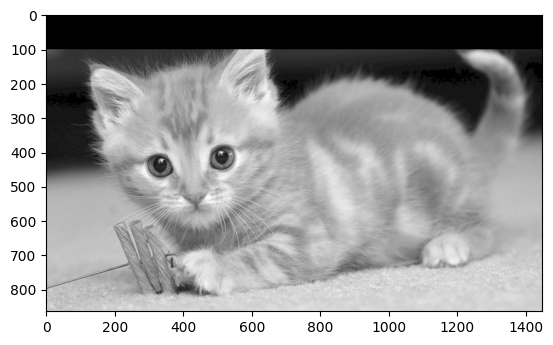

In [215]:
image1[50:100, :] = 0
plt.imshow(image1, cmap="gray")


In [210]:
def amBan(image):
    return 255 - image

In [254]:
def chuyen_doi_log(image, c):
    return c * (np.log(1 + image))

#Chưa hiểu

In [259]:
def chuyen_doi_mu(image, g, c):
    return float(c) * np.pow(image, float(g))

[[0.32411067 0.31620553 0.32411067 ... 0.1541502  0.1541502  0.1541502 ]
 [0.31620553 0.31620553 0.31620553 ... 0.1541502  0.1541502  0.1541502 ]
 [0.31620553 0.32411067 0.3083004  ... 0.1541502  0.1541502  0.1541502 ]
 ...
 [0.77865613 0.77865613 0.77865613 ... 0.81422925 0.81818182 0.81818182]
 [0.78656126 0.77865613 0.78656126 ... 0.81818182 0.81818182 0.81818182]
 [0.78656126 0.78656126 0.78656126 ... 0.81422925 0.81818182 0.81818182]]


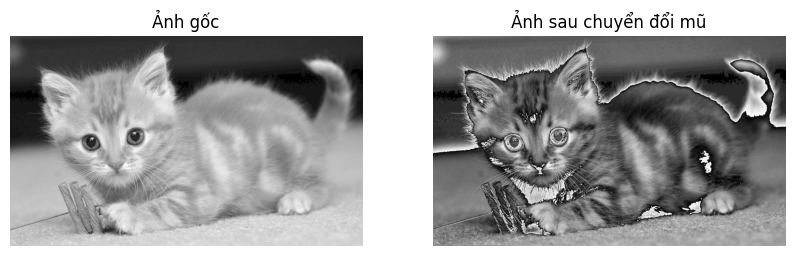

In [303]:
image1 = cv2.imread(iname1, 0)
g = 1
c = 1.0 / np.pow(np.max(image1), g)

image1 = cv2.imread(iname1, 0)
image1 = chuyen_doi_mu(image1, g, c)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image1, cmap="gray")
plt.title("Ảnh gốc")
plt.axis("off")
print(image1)

c = 2
image1 = cv2.imread(iname1, 0)
image1 = chuyen_doi_mu(image1, g, c)
plt.subplot(1,2,2)
plt.imshow(image1, cmap="gray")
plt.title("Ảnh sau chuyển đổi mũ")
plt.axis("off")

plt.show()

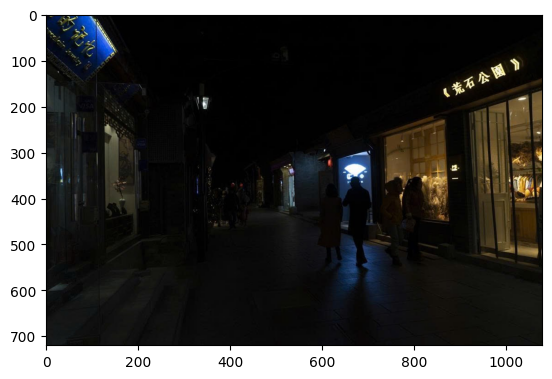

In [419]:
img = cv2.imread("img/blur.png")
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = img[:,:,::-1]
plt.imshow(img)

In [420]:
r, g, b = cv2.split(img)
r

array([[ 6, 28, 12, ...,  1,  1,  1],
       [20,  2,  4, ...,  1,  1,  1],
       [14, 10,  9, ...,  1,  1,  1],
       ...,
       [22, 22, 23, ..., 19, 19, 19],
       [22, 22, 23, ..., 18, 18, 19],
       [22, 22, 23, ..., 17, 18, 18]], dtype=uint8)

In [421]:
def to_array(npArray):
    arr = []
    for i in range(256):
        arr.append(np.count_nonzero(npArray==i))
    return np.array(arr)

In [422]:
def cal_img(npArray):
    arr = np.bincount(npArray.flatten(), minlength=256)
    pdf = arr / npArray.size
    cdf = np.cumsum(pdf)
    # cdf_norm = (cdf.max
    tf = np.round(cdf * 255)
    img = tf[npArray]
    return img

In [424]:
tf_r = cal_img(r)
tf_g = cal_img(g)
tf_b = cal_img(b)

img_refine = cv2.merge((tf_r, tf_g, tf_b))
plt.imshow(img_refine.astype(np.uint8))
# img_refine.min()
# img_refine = cv2.cvtColor(img_refine.astype(np.uint8))

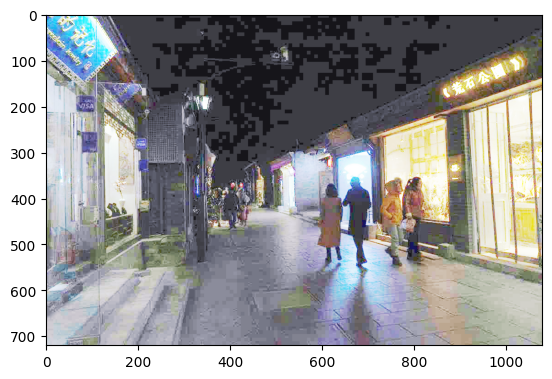